# Task 01 - Data Normalization & Z-Score
### Student Name: Pratham Shukla

In [3]:
 import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

In [4]:
# Load dataset 
df = pd.read_csv("sales.csv")
print("Original Data:")
df.head()

Original Data:


,SalesID,Quantity,Price,Discount,Revenue
0,1,52,354.14,0.43,9665.46
1,2,93,427.46,0.44,1449.26
2,3,15,184.74,0.29,7571.53
3,4,72,138.08,0.26,3370.39
4,5,61,473.83,0.41,2974.54



MinMaxScaler Result (first 5 rows):
   SalesID  Quantity     Price  Discount   Revenue
0   0.0000  0.520408  0.702362      0.86  0.966233
1   0.0001  0.938776  0.852028      0.88  0.136275
2   0.0002  0.142857  0.356570      0.58  0.754715
3   0.0003  0.724490  0.261324      0.52  0.330338
4   0.0004  0.612245  0.946682      0.82  0.290351


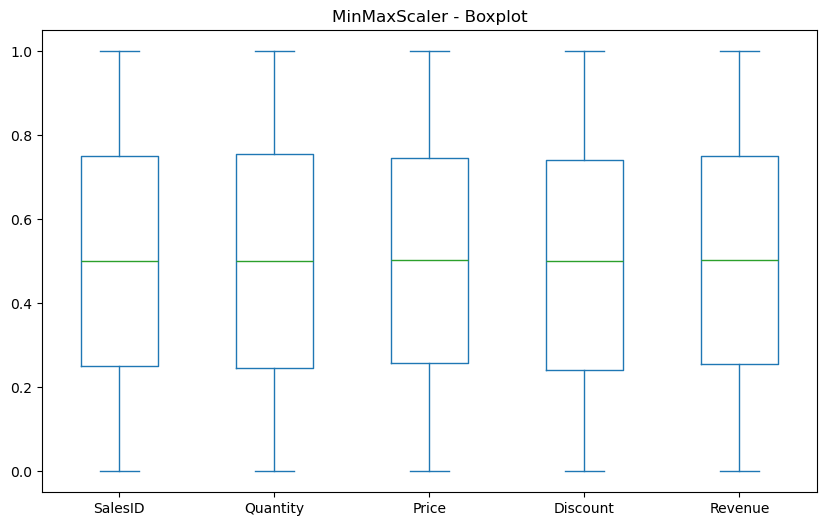


StandardScaler (Z-Score) Result (first 5 rows):
    SalesID  Quantity     Price  Discount   Revenue
0 -1.731878  0.074240  0.699331  1.245462  1.618937
1 -1.731531  1.507303  1.220587  1.314533 -1.264164
2 -1.731185 -1.219012 -0.504988  0.278467  0.884168
3 -1.730838  0.773295 -0.836709  0.071254 -0.590031
4 -1.730492  0.388814  1.550246  1.107320 -0.728936


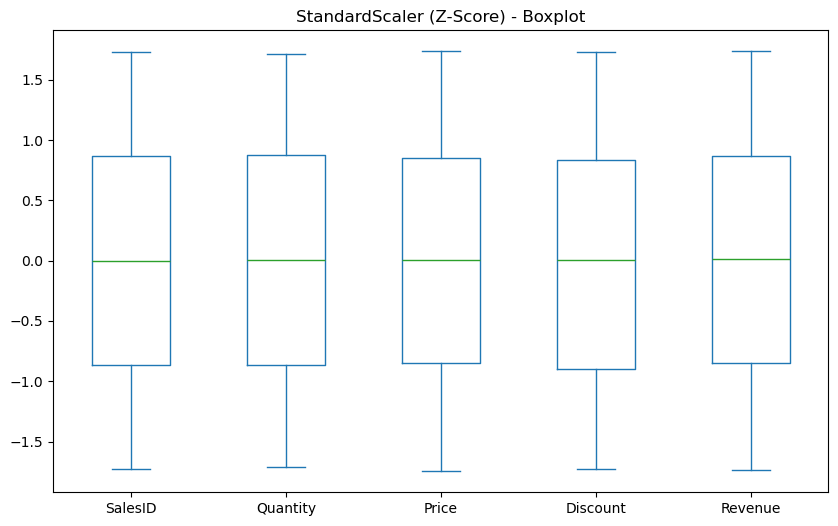


RobustScaler Result (first 5 rows):
   SalesID  Quantity     Price  Discount   Revenue
0  -1.0000      0.04  0.409765      0.72  0.936350
1  -0.9998      0.86  0.716274      0.76 -0.741043
2  -0.9996     -0.70 -0.298399      0.16  0.508860
3  -0.9994      0.44 -0.493458      0.04 -0.348832
4  -0.9992      0.22  0.910121      0.64 -0.429647


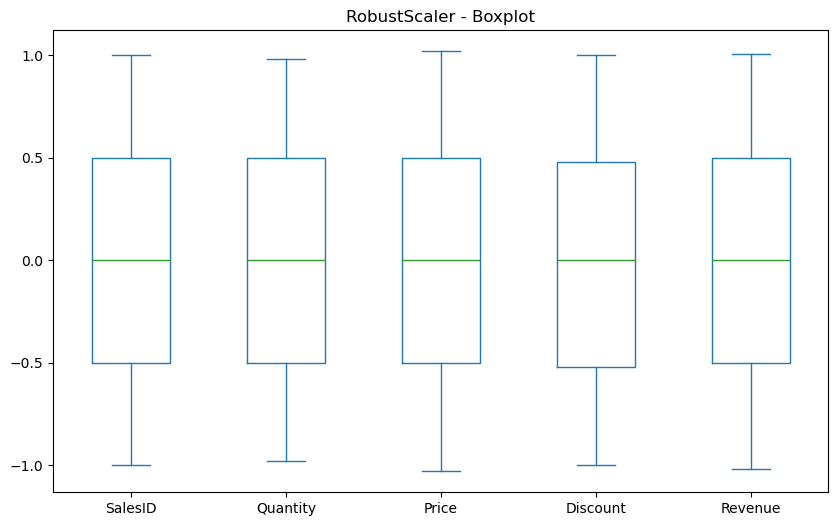


MaxAbsScaler Result (first 5 rows):
   SalesID  Quantity     Price  Discount   Revenue
0   0.0001  0.525253  0.708351      0.86  0.966571
1   0.0002  0.939394  0.855006      0.88  0.144930
2   0.0003  0.151515  0.369517      0.58  0.757173
3   0.0004  0.727273  0.276188      0.52  0.337048
4   0.0005  0.616162  0.947755      0.82  0.297462


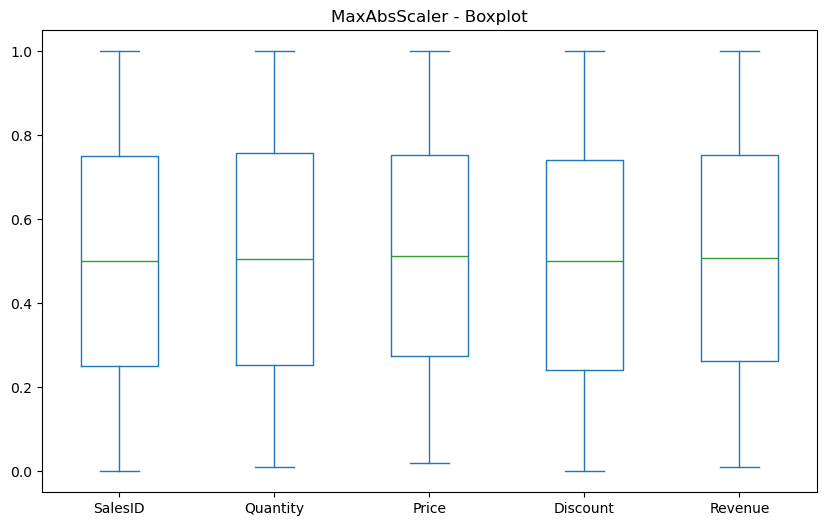

In [11]:
# Normalization Techniques 
scalers = {    "MinMaxScaler": MinMaxScaler(),    
               "StandardScaler (Z-Score)": StandardScaler(),    
               "RobustScaler": RobustScaler(),    
               "MaxAbsScaler": MaxAbsScaler()}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))    
    scaled_df = pd.DataFrame(scaled, columns=df.select_dtypes(include=[np.number]).columns)    
    print(f"\n{name} Result (first 5 rows):")    
    print(scaled_df.head())

# Boxplot
    scaled_df.plot(kind="box", figsize=(10,6), title=f"{name} - Boxplot")
    plt.show()   




Z-Score Normalization with Mean Centering:
    SalesID  Quantity     Price  Discount   Revenue
0 -1.731878  0.074240  0.699331  1.245462  1.618937
1 -1.731531  1.507303  1.220587  1.314533 -1.264164
2 -1.731185 -1.219012 -0.504988  0.278467  0.884168
3 -1.730838  0.773295 -0.836709  0.071254 -0.590031
4 -1.730492  0.388814  1.550246  1.107320 -0.728936


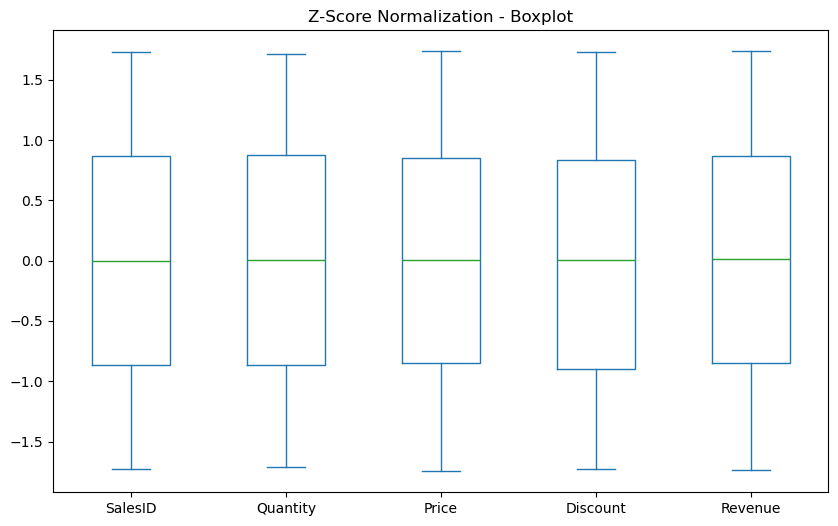

In [16]:
# Mean Centering with Z-Score 
scaler = StandardScaler(with_mean=True, with_std=True)
zscore_centered = scaler.fit_transform(df.select_dtypes(include=[np.number]))
zscore_df = pd.DataFrame(zscore_centered, columns=df.select_dtypes(include=[np.number]).columns)
print("\nZ-Score Normalization with Mean Centering:")
print(zscore_df.head())
zscore_df.plot(kind="box", figsize=(10,6), title=f"Z-Score Normalization - Boxplot")
plt.show()